# Multi-Class Classification Model: UFO Shape Classifier

**Data BackGround**

Data Source: https://www.kaggle.com/datasets/NUFORC/ufo-sightings?resource=download

Context
- This dataset contains over 80,000 reports of UFO sightings over the last century.

Content
- There are two versions of this dataset: scrubbed and complete. The complete data includes entries where the location of the sighting was not found or blank (0.8146%) or have an erroneous or blank time (8.0237%). Since the reports date back to the 20th century, some older data might be obscured. Data contains city, state, time, description, and duration of each sighting.

Inspiration
1. What areas of the country are most likely to have UFO sightings?
2. Are there any trends in UFO sightings over time? Do they tend to be clustered or seasonal?
3. Do clusters of UFO sightings correlate with landmarks, such as airports or government research centers?
4. What are the most common UFO descriptions?

Acknowledgement
This dataset was scraped, geolocated, and time standardized from NUFORC data by Sigmond Axel here.

**Problem Statement**

How can we classify UFO sightings based on their shapes and identify any other potential trends or patterns using machine learning?

Data Source
The primary dataset for this project is sourced from Kaggle: https://www.kaggle.com/datasets/NUFORC/ufo-sightings/dataLinks to an external site.

Techniques Expected to Use in Analysis

- Data Preprocessing: Cleaning and preparing the data for analysis, including handling missing values and standardizing formats.
- Exploratory Data Analysis (EDA): Initial examination of the data to uncover basic patterns, anomalies, and insights.
- Feature Engineering: Creating relevant features that may improve the performance of the machine learning models.
 

Machine Learning Models:

- Multi-Class Classification Algorithms: Techniques such as Decision Trees, Random Forest, Support Vector Machines (SVM), and Neural Networks to classify UFO shapes.
- Clustering Algorithms: Methods like K-Means and DBSCAN to identify patterns and trends in the data.
 

Model Evaluation and Validation: Using metrics like accuracy, precision, recall, F1-score, and cross-validation techniques to evaluate the models' performance.
 

Expected Results

- A robust classification model capable of accurately predicting UFO shapes based on sighting reports.
- Identification of temporal and geographical trends in UFO sightings, such as seasonal patterns and regional hotspots.
- Insights into correlations between UFO sightings and various landmarks or significant locations.

Importance of the Question

- Understanding the patterns and classifications of UFO sightings has several important implications:

- Public Interest and Safety: By identifying patterns in UFO sightings, we can address public curiosity and concerns. If certain shapes or trends correlate with specific times or locations, authorities can better manage public safety and information dissemination.

- Scientific Inquiry: This research can contribute to the broader scientific community's understanding of unexplained aerial phenomena. By providing a systematic analysis of UFO sightings, we add to the body of knowledge that may inspire further research and technological advancements.

- Policy Making: Insights from this analysis can aid governmental and defense agencies in resource allocation and preparedness. Recognizing patterns in sightings might help in developing protocols for investigation and response.

- Cultural Impact: UFO sightings are a part of modern folklore and cultural identity. This project can provide a data-driven narrative that complements anecdotal evidence, enriching cultural and historical contexts.

If this question remains unanswered, a significant portion of UFO-related data would remain underutilized, and public curiosity would be left unaddressed. Moreover, potential patterns and trends that could have practical implications for safety and policy-making would go unnoticed. By conducting this analysis, we provide actionable intelligence that can inform various stakeholders and contribute to a more informed and prepared society.

Overall, this project aims to bridge the gap between anecdotal UFO sightings and empirical analysis, providing clarity and insights into a phenomenon that has captivated human imagination for decades.

In [1]:
# Gathering and Importing neccessary resources and tools

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, recall_score, make_scorer,  precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.datasets import load_digits
import plotly.express as px
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

import json
import time
import pprint
import mplcursors
import warnings

import logging
#logging.basicConfig(level=logging.DEBUG, format='%(asctime)s - %(message)s')
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(message)s')


from sklearn.model_selection import StratifiedKFold
from sklearn.exceptions import UndefinedMetricWarning
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

pd.set_option('display.max_colwidth', 200)

# Natural Language ToolKit Package
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string


### **Data Understanding**

In [2]:
# Read in UFO data

UFO = pd.read_csv('Data/scrubbed.csv')
UFO.head()

C:\Users\shiva\AppData\Local\Temp\ipykernel_28452\4001445860.py:3: DtypeWarning: Columns (5,9) have mixed types. Specify dtype option on import or set low_memory=False.
  UFO = pd.read_csv('Data/scrubbed.csv')


,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 1949-50. It occurred after a Boy Scout meeting in the Baptist Church. The Baptist Church sit,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing across the sky &amp; making 90 degree turns on a dime.,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 England,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving the only Edna theater at about 9 PM&#44...we had our bikes and I took a different route home,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/attack aircraft on a solo night exercise&#44 I was at 50&#44000&#39 in a &quot;clean&quot; aircraft (no ordinan,1/22/2004,21.4180556,-157.803611


In [3]:
UFO.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80332 entries, 0 to 80331
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   datetime              80332 non-null  object 
 1   city                  80332 non-null  object 
 2   state                 74535 non-null  object 
 3   country               70662 non-null  object 
 4   shape                 78400 non-null  object 
 5   duration (seconds)    80332 non-null  object 
 6   duration (hours/min)  80332 non-null  object 
 7   comments              80317 non-null  object 
 8   date posted           80332 non-null  object 
 9   latitude              80332 non-null  object 
 10  longitude             80332 non-null  float64
dtypes: float64(1), object(10)
memory usage: 6.7+ MB


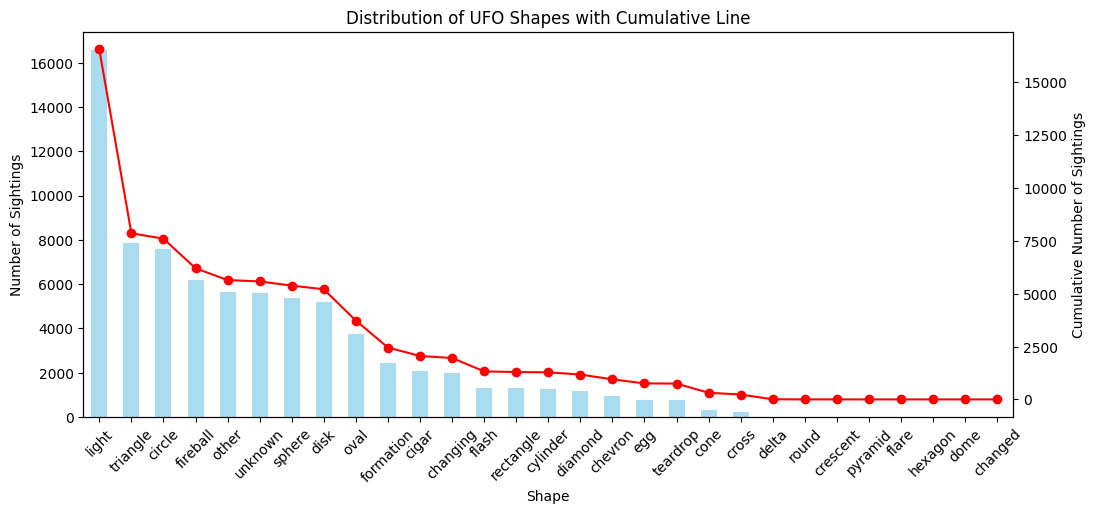

In [4]:
# Target feature distribution (shape)

ufo_shape_counts = UFO['shape'].value_counts()

plt.figure(figsize=(12,5))
ax = ufo_shape_counts.plot(kind='bar', color='skyblue', alpha = 0.7)
ufo_shape_counts.plot(kind='line', color='red', marker='o', ax=ax, secondary_y=True)

ax.set_title('Distribution of UFO Shapes with Cumulative Line')
ax.set_xlabel('Shape')
ax.set_ylabel('Number of Sightings')
ax.right_ax.set_ylabel('Cumulative Number of Sightings')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.show()


In [5]:
UFO['shape'].value_counts()

shape
light        16565
triangle      7865
circle        7608
fireball      6208
other         5649
unknown       5584
sphere        5387
disk          5213
oval          3733
formation     2457
cigar         2057
changing      1962
flash         1328
rectangle     1297
cylinder      1283
diamond       1178
chevron        952
egg            759
teardrop       750
cone           316
cross          233
delta            7
round            2
crescent         2
pyramid          1
flare            1
hexagon          1
dome             1
changed          1
Name: count, dtype: int64

In [6]:
UFO.head()

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 1949-50. It occurred after a Boy Scout meeting in the Baptist Church. The Baptist Church sit,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing across the sky &amp; making 90 degree turns on a dime.,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 England,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving the only Edna theater at about 9 PM&#44...we had our bikes and I took a different route home,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/attack aircraft on a solo night exercise&#44 I was at 50&#44000&#39 in a &quot;clean&quot; aircraft (no ordinan,1/22/2004,21.4180556,-157.803611


### **Initial Data Cleaning and Imputation**

Cleaning steps:

- Create new data set for cleaning while preserving original dataset.
- Remove duration(hours/min) column as duration in seconds is present. Removed due to redundency.
- Transform feature to their respective datatype (numeric to int or float, datetime to datetime, etc...).
- Analyse and impute state and county feature.
- Drop rows with NA values.


In [7]:
# creating new dataset for cleaning purposes
ufo_clean = UFO.copy()

# Dropping duration(hours/min) column
ufo_clean.drop(columns = 'duration (hours/min)', inplace = True)

#Transform dates to datetime
ufo_clean['datetime'] = pd.to_datetime(ufo_clean['datetime'], errors='coerce')
ufo_clean['date posted'] = pd.to_datetime(ufo_clean['date posted'], errors='coerce')

 
#Transforming duration to int datatype and latitude to float
ufo_clean['duration (seconds)'] = pd.to_numeric(ufo_clean['duration (seconds)'], errors='coerce')
ufo_clean['latitude'] = pd.to_numeric(ufo_clean['latitude'], errors='coerce')

ufo_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80332 entries, 0 to 80331
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   datetime            79638 non-null  datetime64[ns]
 1   city                80332 non-null  object        
 2   state               74535 non-null  object        
 3   country             70662 non-null  object        
 4   shape               78400 non-null  object        
 5   duration (seconds)  80329 non-null  float64       
 6   comments            80317 non-null  object        
 7   date posted         80332 non-null  datetime64[ns]
 8   latitude            80331 non-null  float64       
 9   longitude           80332 non-null  float64       
dtypes: datetime64[ns](2), float64(3), object(5)
memory usage: 6.1+ MB


**Stripping leading and trailing spaces from the data**

In [8]:
# Strip spaces from column names
ufo_clean.columns = ufo_clean.columns.str.strip()

# Strip spaces from each value in the DataFrame
ufo_clean = ufo_clean.apply(lambda x: x.strip() if isinstance(x, str) else x)

**Remove outliers Imputing target feature Shape**

In [9]:
ufo_clean['shape'].value_counts()

shape
light        16565
triangle      7865
circle        7608
fireball      6208
other         5649
unknown       5584
sphere        5387
disk          5213
oval          3733
formation     2457
cigar         2057
changing      1962
flash         1328
rectangle     1297
cylinder      1283
diamond       1178
chevron        952
egg            759
teardrop       750
cone           316
cross          233
delta            7
round            2
crescent         2
pyramid          1
flare            1
hexagon          1
dome             1
changed          1
Name: count, dtype: int64

It is clear from the above information, that there are about 8 shapes that have extremly minimal data points. Due to lack of observations on these shapes, they may be removed from the dataset.This data is not useful for predictive classification. 

In [10]:
# Calculate shape value counts
shape_counts = ufo_clean['shape'].value_counts()

# Identify shapes with counts less than 10
shapes_to_remove = shape_counts[shape_counts < 10].index.tolist()

# Filter rows to remove shapes with counts less than 10
ufo_clean = ufo_clean[~ufo_clean['shape'].isin(shapes_to_remove)]

ufo_clean.reset_index(drop=True, inplace=True)

# Verify the result
print(ufo_clean['shape'].value_counts())

shape
light        16565
triangle      7865
circle        7608
fireball      6208
other         5649
unknown       5584
sphere        5387
disk          5213
oval          3733
formation     2457
cigar         2057
changing      1962
flash         1328
rectangle     1297
cylinder      1283
diamond       1178
chevron        952
egg            759
teardrop       750
cone           316
cross          233
Name: count, dtype: int64


We have removed 8 shapes from the data, now we are left with 21 shapes for multi-class classification. 

In [11]:
# Comments of 'Unknown' and 'Other' shape observations
ufo_clean[(ufo_clean['shape'] == 'unknown') | (ufo_clean['shape'] == 'other')].head()

,datetime,city,state,country,shape,duration (seconds),comments,date posted,latitude,longitude
13,1970-10-10 19:00:00,manchester,ky,us,unknown,180.0,Slow moving&#44 silent craft accelerated at an unbelievable angle and speed.,2008-02-14,37.153611,-83.761944
19,1974-10-10 19:30:00,hudson,ma,us,other,2700.0,Not sure of the eact month or year of this sighting but it was in the fall of 74 or 75. Was walking home around dusk and saw a bright l,1999-08-10,42.391667,-71.566667
25,1977-10-10 12:00:00,san antonio,tx,us,other,30.0,i was about six or seven and my family and me were sitting next to a window at home eating when a type of dark ball hit the screen wind,2005-02-24,29.423889,-98.493333
31,1979-10-10 22:00:00,security,co,us,unknown,1800.0,very low clouds all different colors&#44search lights were seen shining down out of the clouds on the houses and streets. this event was s,1999-01-28,38.758333,-104.742500
33,1980-10-10 22:00:00,dallas,tx,us,unknown,300.0,Strange shape shifting craft of pure light energy.,2002-10-28,32.783333,-96.800000


In [12]:
# Comments of 'Unknown' and 'Other' shape observations
ufo_clean[(ufo_clean['shape'] == 'formation') | (ufo_clean['shape'] == 'changing')].head()

,datetime,city,state,country,shape,duration (seconds),comments,date posted,latitude,longitude
38,1984-10-10 22:00:00,white plains,ny,us,formation,20.0,Saw a hugh object in sky with lights intermittently placed not making any noise traveling north in the night sky.It had no real identif,1999-08-10,41.033889,-73.763333
51,1992-10-10 17:00:00,panama city,fl,us,formation,3600.0,During a road trip to Panama City a friend and I witnessed a pair of luminous light formations appear and dissappear over the Gulf.,1999-01-28,30.158611,-85.660278
71,1998-10-10 02:30:00,hollywood,ca,us,changing,300.0,I was standing outside on Sunset Blvd. at Vine and looked straight up which I normally do not do. I saw three bright white lights in a,1998-11-01,34.098333,-118.325833
81,1999-10-10 00:01:00,martinez,ca,us,changing,3600.0,Bright objects&#44 red and green flashing lights (and a diffuse white light off to one side of the larger of the two objects)&#44 about 30 de,1999-10-19,38.019444,-122.133056
102,2001-10-10 04:33:00,sydney (nsw&#44 australia),NaN,au,formation,180.0,formation and impact,2001-11-20,-33.861481,151.205475


Looking at the left over shapes, we can observe somethign really important. Some shapes have synonymous definitions. It is reasonable to define the shape of an egg as an oval. Yet, in the shape classes, there is a class that represents oval 'shaped' observation and another class is represented as an egg shaped observation. The same goes for circle and disk, cylinder and cigar. When it comes to 'unknown' or 'other', based on the comments provided, the shape of the sighting may not have been recorded or was concluded not definitive. This means, unknown and other can be used interchangeably. The obervations for changing and formation are also similar when viewing comments on these classes. From these observation, let us impute some of the classes and combine with their counterpart. We will selected one class and name and map to the other while maintain all other attributes integrity. Combining synonymous classes in your dataset based on observed similarities is a reasonable idea, particularly when dealing with categorical data where overlapping or synonymous categories can add noise and reduce the clarity of analysis.

- Benefits:
    - Data Simplification: Reducing the number of classes makes the dataset simpler and more manageable, which can improve the performance of your clustering algorithms and make the results easier to interpret.
    - Increased Sample Size: By merging similar categories, you increase the sample size of the combined class, which can lead to more robust statistical analyses.
    - Reduced Redundancy: Eliminating synonymous categories helps in reducing redundancy in the dataset, which can improve the overall quality of the data. 

- Considerations:
    - Loss of Specificity: While combining classes can simplify the data, it might also lead to a loss of specific information that could be valuable. For instance, the distinction between 'disk' and 'circle' might carry some nuances that are lost when combined.
    - Validation: Ensure that the mappings are validated by domain experts if possible. What might seem synonymous to a layperson could have subtle differences in a specialized field like UFO sightings.
    - Consistency: Make sure the mappings are applied consistently across the dataset to avoid introducing new inconsistencies.

In [13]:
# mapping shapes counterpart based on above analysis
shape_mapping = {
    'circle': 'disk',
    'egg': 'oval',
    'cylinder': 'cigar',
    'unknown': 'other',
    'formation': 'changing'
}

ufo_clean.loc[:,'shape'] = ufo_clean['shape'].replace(shape_mapping)

In [14]:
# Observe the 'Shape' classes have now reduced to 16. 
ufo_clean['shape'].value_counts()

shape
light        16565
disk         12821
other        11233
triangle      7865
fireball      6208
sphere        5387
oval          4492
changing      4419
cigar         3340
flash         1328
rectangle     1297
diamond       1178
chevron        952
teardrop       750
cone           316
cross          233
Name: count, dtype: int64

##### Impute state and county features

In [15]:
# Replace country codes with their respective names to avoid collision with state codes
country_mapping = {
    'us': 'United States',
    'ca': 'Canada',
    'gb': 'United Kingdom',
    'de': 'Germany',
    'au': 'Australia'
}

# Replace country codes with country names
ufo_clean['country'] = ufo_clean['country'].replace(country_mapping)


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'United States'),
  Text(1, 0, 'Canada'),
  Text(2, 0, 'United Kingdom'),
  Text(3, 0, 'Australia'),
  Text(4, 0, 'Germany')])

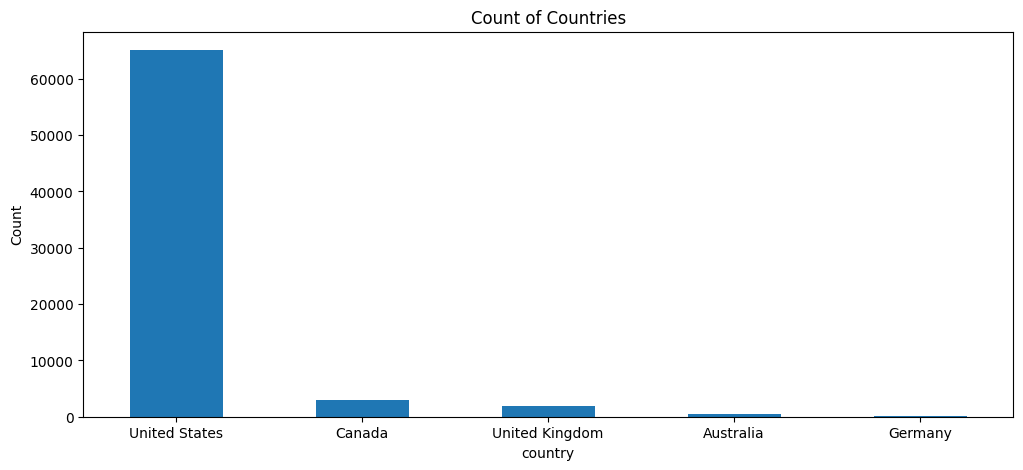

In [16]:
plt.figure(figsize=(12,5))
country_counts = ufo_clean['country'].value_counts()

country_counts.plot(kind='bar')
plt.title("Count of Countries")
plt.ylabel("Count")
plt.xticks(rotation = 360)

It looks like while state values exist, the country is NaN. We can see that 'tx' is a state in US. Using logical imputation, we can fill in the county NA values by using an exisitng state value

In [17]:
# Checking country and state feature wher country is NA
ufo_clean[ufo_clean['country'].isnull()][['country','state']] 

,country,state
1,NaN,tx
18,NaN,NaN
29,NaN,ab
35,NaN,NaN
40,NaN,ny
...,...,...
80222,NaN,co
80228,NaN,me
80303,NaN,nj
80306,NaN,NaN


In [18]:
#Understanding states within non US or Canada countries
ufo_clean[ufo_clean['country'].isin(['United Kingdom','Germany','Australia']) & ufo_clean['state'].notna()][['country','state']].sort_values(by = 'country')

,country,state
2059,Australia,nt
58358,Australia,sa
49165,Australia,nt
48055,Australia,yt
74273,Australia,sa
31961,Australia,wa
78021,Australia,oh
20530,Australia,dc
6215,Australia,wa
21326,Australia,al


There seems to be an issue with some of the data points. Non US and Canada countries have minimal to no state values and some are mis-mapped. For example, from the above dataframe, nc is a US state, but it is mapped with gb. Due to this inconsistency, we will need to replace non US and canada countries state values with their own country code to avoid misinterpretation of the data. 

In [19]:
# Unique State values, there are about 68 unique state values where 50 of them are of US states
state_list = ufo_clean['state'].unique().tolist()
state_list = pd.DataFrame(state_list)
state_list.T

,0,1,2,3,4,5,6,7,8,9,...,58,59,60,61,62,63,64,65,66,67
0,tx,NaN,hi,tn,ct,al,fl,ca,nc,ny,...,ns,qc,de,nd,dc,nt,sa,yt,yk,pe


In [20]:
# List of valid US state abbreviations
countries = ['United States','Canada','United Kingdom','Germany','Australia']

us_states = [
    'al', 'ak', 'az', 'ar', 'ca', 'co', 'ct', 'de', 'fl', 'ga', 'hi', 'id', 'il', 'in', 'ia', 'ks', 
    'ky', 'la', 'me', 'md', 'ma', 'mi', 'mn', 'ms', 'mo', 'mt', 'ne', 'nv', 'nh', 'nj', 'nm', 'ny', 
    'nc', 'nd', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'vt', 'va', 'wa', 'wv', 
    'wi', 'wy'
]

#List of Canadian provinces
canadian_provinces = ['ab', 'on', 'nf', 'bc', 'mb', 'nb', 'ns', 'qc', 'nt', 'yt', 'sk', 'pq', 'sa']


# Function to map state to country
def map_state_to_country(row):
    state = row['state']
    country = row['country']
    
    if pd.notna(state):
        if state in us_states:
            country = 'United States'
        elif state in canadian_provinces:
            country = 'Canada'
    
    if pd.isna(state) and pd.notna(country):
        state = country  # Fill state with country if state is NaN and country exists
    
    return pd.Series({'state': state, 'country': country})

# Apply the mapping function to each row
ufo_clean[['state', 'country']] = ufo_clean.apply(map_state_to_country, axis=1)


In [21]:
# Reduced number of null_values
ufo_clean.dropna(inplace = True)
ufo_clean.reset_index(drop=True, inplace=True)

- Duration (seconds) removing outliers

C:\Users\shiva\AppData\Local\Temp\ipykernel_28452\1305604528.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=ufo_clean['duration (seconds)'], palette='Set2')


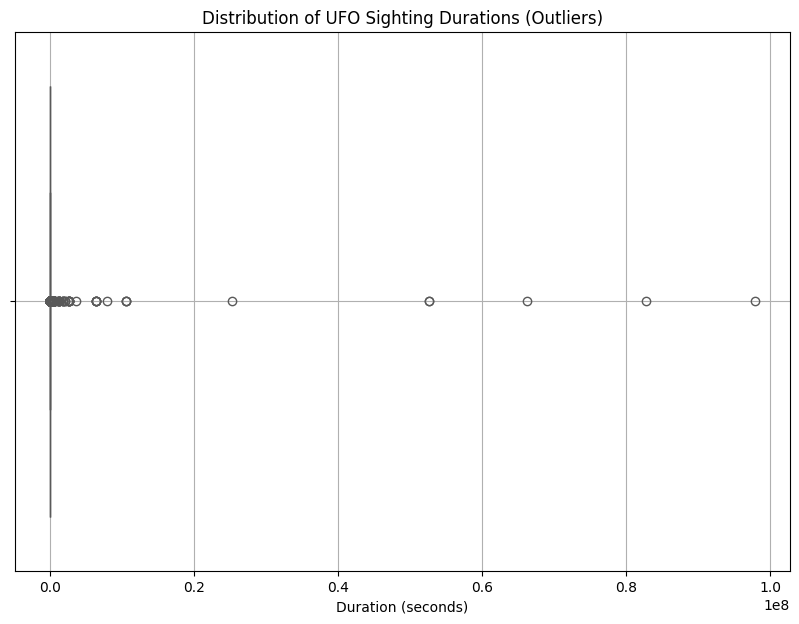

In [22]:
# Plotting boxplot
plt.figure(figsize=(10, 7))
sns.boxplot(x=ufo_clean['duration (seconds)'], palette='Set2')
plt.title('Distribution of UFO Sighting Durations (Outliers)')
plt.xlabel('Duration (seconds)')
plt.grid(True)
plt.show()

In [23]:
print(f'The max duration of a sighting is {ufo_clean["duration (seconds)"].max()} seconds, the minimum duration is \
{ufo_clean["duration (seconds)"].min()} seconds and the average duration is {ufo_clean["duration (seconds)"].mean()} seconds')

The max duration of a sighting is 97836000.0 seconds, the minimum duration is 0.001 seconds and the average duration is 7877.286460723777 seconds


we can see that there are some values for duration that are extreme values which can impact the models and training. We can preform IQR method to rid outliers but the extreme outliers can also impact lower bound and upper bound when calculating 25% and 75% quantiles. Lets rid of extreme outliers using percentile method.  

In [24]:
def remove_outliers_percentile(df, column, lower_percentile=0.01, upper_percentile=0.98):
    lower_bound = df[column].quantile(lower_percentile)
    upper_bound = df[column].quantile(upper_percentile)
    df.drop(df[(df[column] < lower_bound) | (df[column] > upper_bound)].index, inplace=True)

remove_outliers_percentile(ufo_clean, 'duration (seconds)')

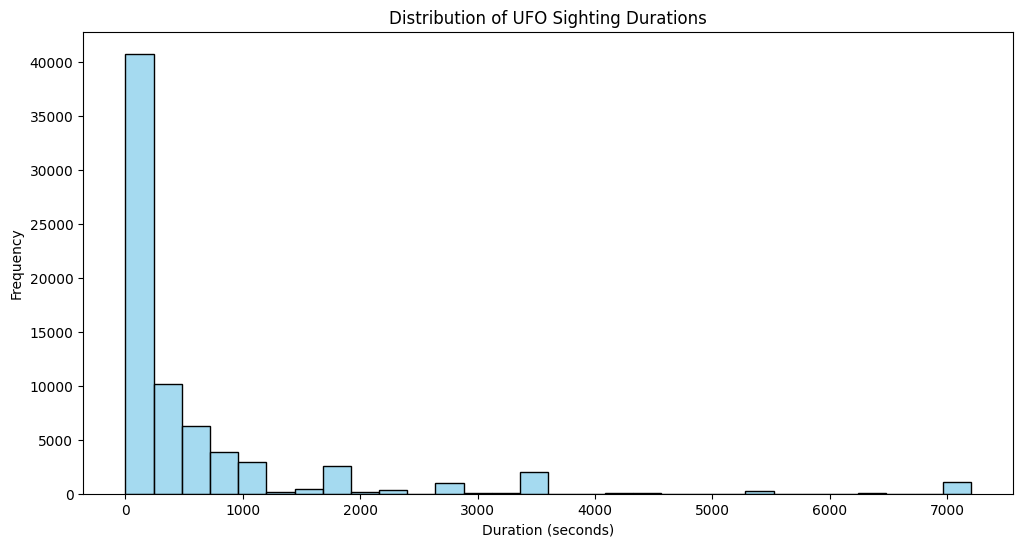

In [25]:
# Plotting histogram
plt.figure(figsize=(12, 6))
sns.histplot(ufo_clean['duration (seconds)'], bins=30, kde=False, color='skyblue')
plt.title('Distribution of UFO Sighting Durations')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.show()

In [26]:
print(f'AFTER REMOVING OUTLIERS: The max duration of a sighting is {ufo_clean["duration (seconds)"].max()} seconds, the minimum duration is \
{ufo_clean["duration (seconds)"].min()} seconds and the average duration is {ufo_clean["duration (seconds)"].mean()} seconds')

AFTER REMOVING OUTLIERS: The max duration of a sighting is 7200.0 seconds, the minimum duration is 1.5 seconds and the average duration is 611.0101017590368 seconds


C:\Users\shiva\AppData\Local\Temp\ipykernel_28452\62402143.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=ufo_clean['duration (seconds)'], palette='Set2')


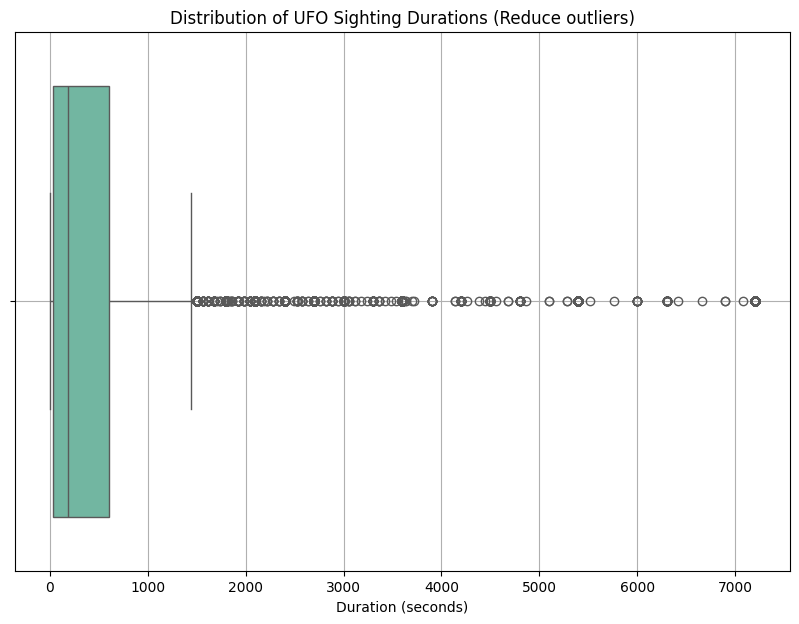

In [27]:
# Plotting boxplot
plt.figure(figsize=(10, 7))
sns.boxplot(x=ufo_clean['duration (seconds)'], palette='Set2')
plt.title('Distribution of UFO Sighting Durations (Reduce outliers)')
plt.xlabel('Duration (seconds)')
plt.grid(True)
plt.show()

In [28]:
ufo_clean.reset_index(drop=True, inplace=True)
ufo_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72426 entries, 0 to 72425
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   datetime            72426 non-null  datetime64[ns]
 1   city                72426 non-null  object        
 2   state               72426 non-null  object        
 3   country             72426 non-null  object        
 4   shape               72426 non-null  object        
 5   duration (seconds)  72426 non-null  float64       
 6   comments            72426 non-null  object        
 7   date posted         72426 non-null  datetime64[ns]
 8   latitude            72426 non-null  float64       
 9   longitude           72426 non-null  float64       
dtypes: datetime64[ns](2), float64(3), object(5)
memory usage: 5.5+ MB


In [29]:
ufo_clean.describe()

,datetime,duration (seconds),date posted,latitude,longitude
count,72426,72426.000000,72426,72426.000000,72426.000000
mean,2004-08-15 20:12:11.251760512,611.010102,2007-09-16 05:51:24.052688384,38.575530,-91.022464
min,1910-06-01 15:00:00,1.500000,1998-03-07 00:00:00,-42.883209,-170.478889
25%,2001-11-14 13:37:30,30.000000,2004-01-17 00:00:00,34.225556,-112.357500
50%,2007-02-17 03:11:00,180.000000,2008-02-14 00:00:00,39.466667,-88.299468
75%,2011-07-28 20:26:15,600.000000,2011-12-12 00:00:00,42.652500,-79.832292
max,2014-05-08 18:45:00,7200.000000,2014-05-08 00:00:00,72.700000,153.611938
std,NaN,1174.738491,NaN,8.659247,30.835442


### **Features Analysis**

In [30]:
ufo_clean

,datetime,city,state,country,shape,duration (seconds),comments,date posted,latitude,longitude
0,1949-10-10 20:30:00,san marcos,tx,United States,cigar,2700.0,This event took place in early fall around 1949-50. It occurred after a Boy Scout meeting in the Baptist Church. The Baptist Church sit,2004-04-27,29.883056,-97.941111
1,1949-10-10 21:00:00,lackland afb,tx,United States,light,7200.0,1949 Lackland AFB&#44 TX. Lights racing across the sky &amp; making 90 degree turns on a dime.,2005-12-16,29.384210,-98.581082
2,1955-10-10 17:00:00,chester (uk/england),United Kingdom,United Kingdom,disk,20.0,Green/Orange circular disc over Chester&#44 England,2008-01-21,53.200000,-2.916667
3,1956-10-10 21:00:00,edna,tx,United States,disk,20.0,My older brother and twin sister were leaving the only Edna theater at about 9 PM&#44...we had our bikes and I took a different route home,2004-01-17,28.978333,-96.645833
4,1960-10-10 20:00:00,kaneohe,hi,United States,light,900.0,AS a Marine 1st Lt. flying an FJ4B fighter/attack aircraft on a solo night exercise&#44 I was at 50&#44000&#39 in a &quot;clean&quot; aircraft (no ordinan,2004-01-22,21.418056,-157.803611
...,...,...,...,...,...,...,...,...,...,...
72421,2013-09-09 21:15:00,nashville,tn,United States,light,600.0,Round from the distance/slowly changing colors and hovering.,2013-09-30,36.165833,-86.784444
72422,2013-09-09 22:00:00,boise,id,United States,disk,1200.0,Boise&#44 ID&#44 spherical&#44 20 min&#44 10 red lights&#44 seen by husband and wife.,2013-09-30,43.613611,-116.202500
72423,2013-09-09 22:00:00,napa,ca,United States,other,1200.0,Napa UFO&#44,2013-09-30,38.297222,-122.284444
72424,2013-09-09 22:20:00,vienna,va,United States,disk,5.0,Saw a five gold lit cicular craft moving fastly from rght to left.,2013-09-30,38.901111,-77.265556


##### How did UFO sightings change over time?

- UFO sightings increased over the years

In [31]:
# Extract year from datetime
ufo_clean['year'] = ufo_clean['datetime'].dt.year

# Count observations per year and country
observations_per_year_country = ufo_clean.groupby(['year', 'country']).size().reset_index(name='count')
observations_per_year_country

,year,country,count
0,1910,United States,1
1,1920,United States,1
2,1925,United States,1
3,1929,United States,1
4,1930,United States,1
...,...,...,...
275,2014,Australia,11
276,2014,Canada,59
277,2014,Germany,1
278,2014,United Kingdom,16


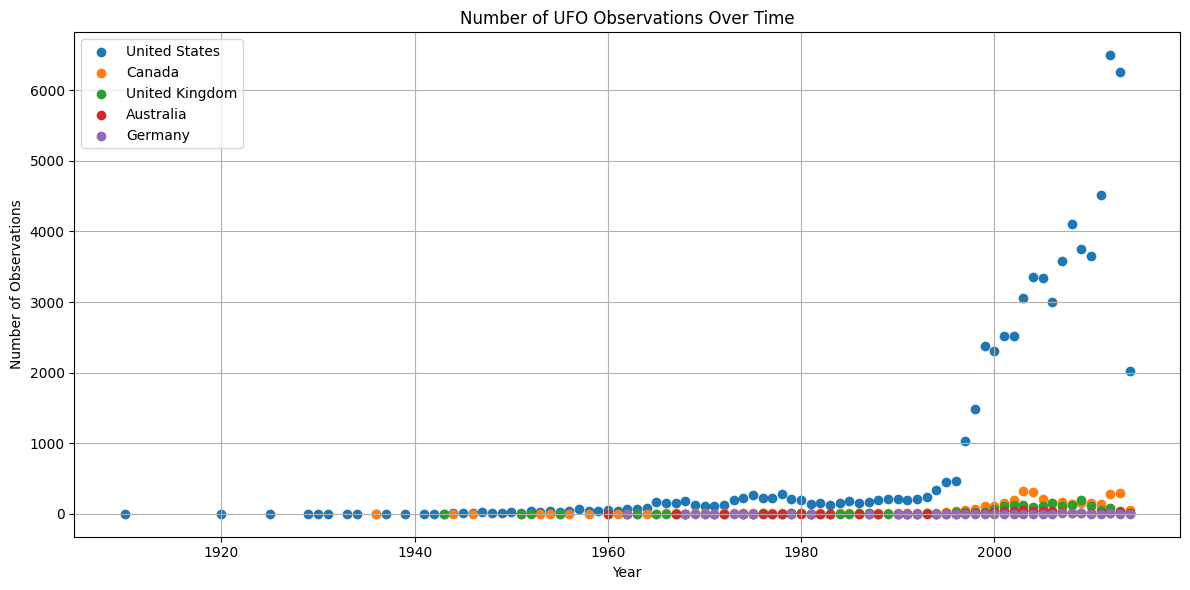

In [32]:
# Plotting
plt.figure(figsize=(12, 6))

# Iterate over unique countries to plot scatter points and set hover text
for country in observations_per_year_country['country'].unique():
    data = observations_per_year_country[observations_per_year_country['country'] == country]
    plt.scatter(data['year'], data['count'], label=country, marker='o')
    
plt.title('Number of UFO Observations Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Observations')
plt.legend()

plt.grid(True)
plt.tight_layout()
plt.show()

##### Exploring UFO obervations by Cities

In [33]:
# Understanding outliers in City feature
city_counts = ufo_clean['city'].value_counts()

print(f'There are {len(city_counts)} unique cities in the dataset')
print(f'There are {len(city_counts[city_counts < 10])} cities that have less than 10 datapoints or observations and {len(city_counts[city_counts > 100])} cities that have 100 are more datapoints')


# Initialize a dictionary to store counts
counts_dict = {
    '>400': len(city_counts[city_counts > 400]),
    '>100': len(city_counts[city_counts > 100]),
    '>50': len(city_counts[city_counts > 50]),
    '>10': len(city_counts[city_counts > 10]),
    '>1': len(city_counts[city_counts > 1]),
    '>0': len(city_counts[city_counts > 0]),
    '>1': len(city_counts[city_counts > 1]),
    '1': len(city_counts[city_counts == 1])
}

# Create a DataFrame from the dictionary
counts_df = pd.DataFrame(list(counts_dict.items()), columns=['# of Observations', 'Number of Cities'])
counts_df


There are 16833 unique cities in the dataset
There are 15347 cities that have less than 10 datapoints or observations and 56 cities that have 100 are more datapoints


,# of Observations,Number of Cities
0,>400,2
1,>100,56
2,>50,175
3,>10,1356
4,>1,6680
5,>0,16833
6,1,10153


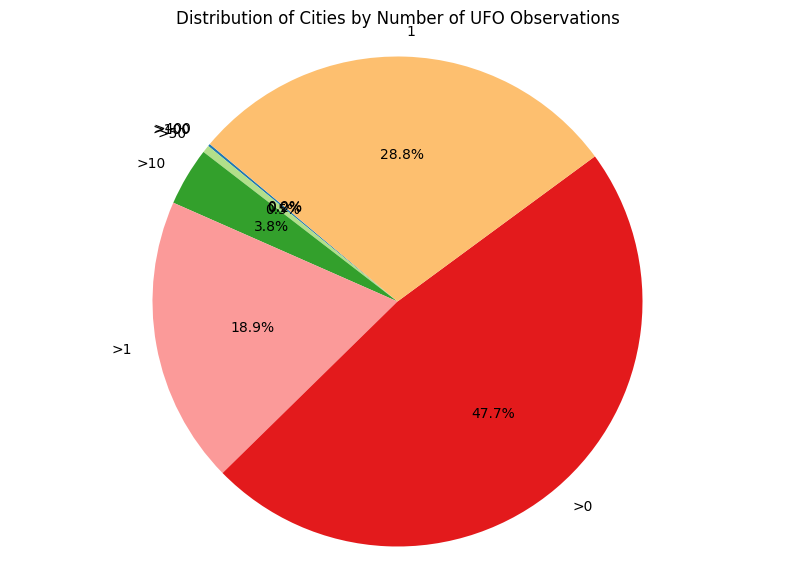

In [34]:
plt.figure(figsize=(10, 7))
plt.pie(counts_df['Number of Cities'], labels=counts_df['# of Observations'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribution of Cities by Number of UFO Observations')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [35]:
# Top 10 cities by oberservations
print("The cities below had the highest reported sightings in the entire dataset:")
city_counts.sort_values(ascending = False)[0:9]

The cities below had the highest reported sightings in the entire dataset:


city
seattle        456
phoenix        420
las vegas      347
portland       347
los angeles    337
san diego      311
houston        281
chicago        250
tucson         231
Name: count, dtype: int64

Exploring duration of sightings of different UFO shapes by country

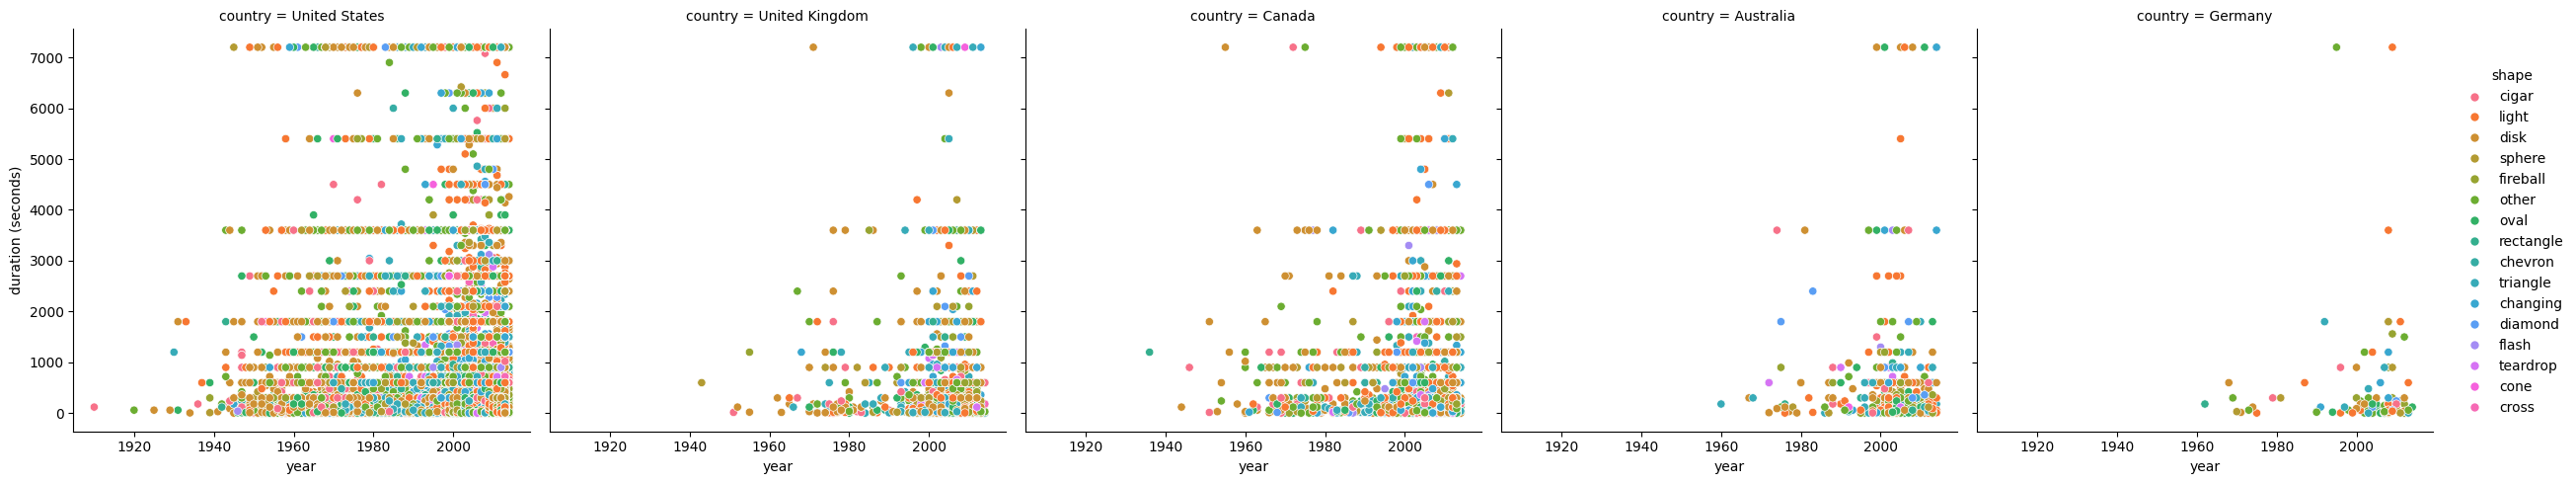

In [36]:
sns.relplot(data = ufo_clean, x = "year", y = "duration (seconds)", col = "country", hue = "shape")

Exploring latitude and longitude of sightings of different UFO shapes by country

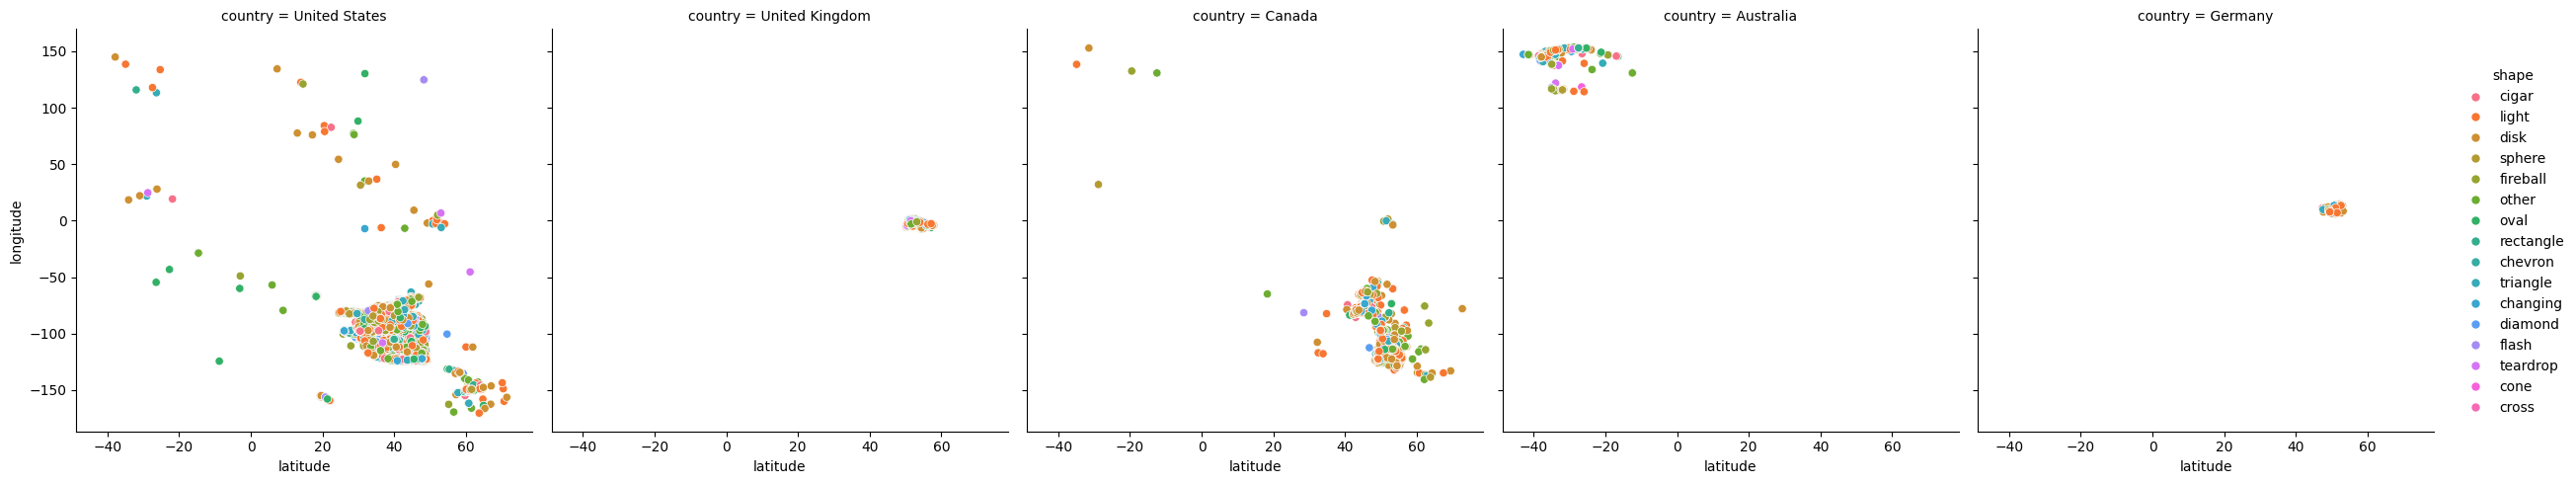

In [37]:
sns.relplot(data = ufo_clean, x = "latitude", y = "longitude", col = "country", hue = "shape")

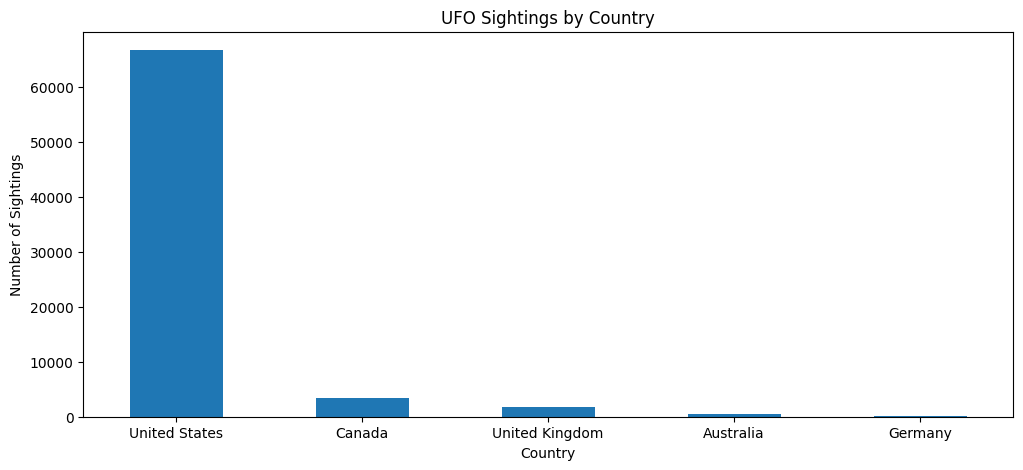

In [38]:
# Get the counts of sightings per country
country_counts = ufo_clean['country'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(12, 5))
country_counts.plot(kind='bar')
plt.title('UFO Sightings by Country')
plt.xlabel('Country')
plt.ylabel('Number of Sightings')
plt.xticks(rotation=0)
plt.show()

Due to a high skewed distribution of country datapoints, it will be excluded from modeling. 

### Modeling 

##### Preprocessing

In [39]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'shape' is your target variable
target = 'shape'

# Excluding longitude and latitude as state is already used. Including latitude and longitude can raise the issue of geographical redundency.
# Separate features and target
features = ['state', 'duration (seconds)']
X = ufo_clean[features].copy()
y = ufo_clean[target].copy()

# Encode the target variable 'shape'
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Define transformers for numerical and categorical columns
numeric_features = ['duration (seconds)',]
numeric_transformer = StandardScaler()

categorical_features = ['state']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Combine transformers into ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])


Splitting training and testing data

In [40]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

##### RandomForest Classifier

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Define pipeline with preprocessing and classifier
RF_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Fit the pipeline (preprocessing + model)
RF_pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['duration (seconds)']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['state'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [42]:
# Predict on test set
RF_train_y_pred = RF_pipeline.predict(X_train)

# Evaluate performance
print(classification_report(y_train, RF_train_y_pred))

# Inverse transform predictions to get original shape labels
RF_train_y_pred_original = label_encoder.inverse_transform(RF_train_y_pred)

              precision    recall  f1-score   support

           0       0.44      0.06      0.10      2843
           1       0.38      0.03      0.05       615
           2       0.50      0.05      0.10      2171
           3       0.48      0.05      0.09       204
           4       0.67      0.04      0.08       143
           5       0.76      0.05      0.09       757
           6       0.26      0.32      0.28      8218
           7       0.28      0.13      0.18      4048
           8       0.47      0.03      0.06       798
           9       0.26      0.71      0.38     10794
          10       0.27      0.21      0.24      7153
          11       0.47      0.05      0.09      2920
          12       0.53      0.04      0.07       839
          13       0.41      0.05      0.10      3490
          14       0.58      0.05      0.10       474
          15       0.29      0.12      0.17      5231

    accuracy                           0.27     50698
   macro avg       0.44   

In [43]:
# Predict on test set
RF_test_y_pred = RF_pipeline.predict(X_test)

# Evaluate performance
print(classification_report(y_test, RF_test_y_pred))

# Inverse transform predictions to get original shape labels
RF_test_y_pred_original = label_encoder.inverse_transform(RF_test_y_pred)

              precision    recall  f1-score   support

           0       0.07      0.01      0.02      1239
           1       0.00      0.00      0.00       296
           2       0.01      0.00      0.00       930
           3       0.00      0.00      0.00        76
           4       0.00      0.00      0.00        75
           5       0.04      0.00      0.01       327
           6       0.18      0.21      0.19      3517
           7       0.15      0.06      0.09      1744
           8       0.00      0.00      0.00       341
           9       0.22      0.61      0.32      4562
          10       0.15      0.12      0.13      3106
          11       0.07      0.01      0.01      1209
          12       0.07      0.01      0.01       386
          13       0.08      0.01      0.02      1499
          14       0.04      0.00      0.01       227
          15       0.12      0.05      0.07      2194

    accuracy                           0.19     21728
   macro avg       0.07   

In [44]:
# Example of how to use the pipeline to predict on new data
new_data = pd.DataFrame({'state': ['tx'], 'country': ['us'], 'duration (seconds)': [100]})
shape_prediction = label_encoder.inverse_transform(RF_pipeline.predict(new_data))
print(f'The shape of the UFO is likely: {shape_prediction}')

The shape of the UFO is likely: ['disk']


The model preformed poorly. The accuracy score was only 19%, with extremly low classification report scores. 

### GridSearch on: LogisticRegression, KNN, DecisionTree

Parameters and scoring considerations:

1. LogisticRegression
    - Multi-class will be set to 'multinomial' used to handling multi-class problems directly. 
    - C (Inverse of regularization strength)

2. KNN:
    - n_neighbors
    - weights
    - leaf_size

3. DecissionTree:
    - max_depth
    - criterion

4. RandomForest:
    - n_estimators
    - max_depth
    - max_features
    - min_samples_split
    - min_samples_leaf

5. GridSearch CV:
    - scoring method is 'Precision_weighted' due to class imbalance
    - Cv method is 'StratifiedKFold' to ensure that each fold maintains the same proportion of class labels as the original dataset, since UFO 'shape' features has imbalanced classes.


In [45]:
from sklearn.model_selection import StratifiedKFold
from sklearn.exceptions import UndefinedMetricWarning, ConvergenceWarning
warnings.filterwarnings("ignore", category= UndefinedMetricWarning) # due to imbalanced shape classes
warnings.filterwarnings("ignore", category= ConvergenceWarning) # due to imbalanced shape classes

GS_models = {
    'Logistic Regression': (LogisticRegression(multi_class='multinomial',random_state=42), {'classifier__C': [0.01, 0.1, 1.0, 10.0, 20.0,100.0]}),
    'KNN': (KNeighborsClassifier(), {'classifier__n_neighbors': [20, 50, 100, 1000], 'classifier__weights': ['distance'], 'classifier__leaf_size': [10,30,50]}),
    'Decision Tree': (DecisionTreeClassifier(), {'classifier__max_depth': [None, 5, 10], 'classifier__criterion': ['gini', 'entropy']})
}


skf = StratifiedKFold(n_splits= 5, shuffle=True, random_state=42)

In [46]:
# Initialize an empty list to store results
GS_results = []

# Iterate over models
for model_name, (model, param_grid) in GS_models.items():
    # Pipeline
    GS_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    
    # GridSearchCV
    logging.info("Training started for model: " + model_name)  # Log the start of training
    grid_search = GridSearchCV(GS_pipeline, param_grid,  n_jobs=4, cv=skf, scoring = 'accuracy', verbose = 5)
    # Start time
    start_time = time.time()
    
    # Fit the model
    grid_search.fit(X_train, y_train)
    # End time
    end_time = time.time()
    
    logging.info("Completed training for model: " + model_name)  # Log completion of training
      
    # Training time
    train_time = end_time - start_time
    
    # Extract best parameters
    best_params = grid_search.best_params_
    
    # Extract best recall score
    best_recall = grid_search.best_score_
    
    # Evaluate the best model on training data
    train_accuracy = accuracy_score(y_train, grid_search.predict(X_train))
    
    # Evaluate the best model on test data
    test_accuracy = accuracy_score(y_test, grid_search.predict(X_test))
    
    # Evaluate the best model precision_weightd score on test data
    test_precision_weighted = precision_score(y_test, grid_search.predict(X_test), average='weighted')
    
    # Append results to list
    GS_results.append({
        'Model': model_name,
        'Best Parameters': best_params,
        'Best Recall (Cross-Validation)': best_recall,
        'Train Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy,
        'Precision_weighted_score': test_precision_weighted,
        'Train Time': train_time
    })


2024-06-29 10:50:41,766 - Training started for model: Logistic Regression


Fitting 5 folds for each of 6 candidates, totalling 30 fits


2024-06-29 10:50:54,274 - Completed training for model: Logistic Regression
2024-06-29 10:50:54,307 - Training started for model: KNN


Fitting 5 folds for each of 12 candidates, totalling 60 fits


2024-06-29 10:55:25,252 - Completed training for model: KNN
2024-06-29 10:57:56,989 - Training started for model: Decision Tree


Fitting 5 folds for each of 6 candidates, totalling 30 fits


2024-06-29 10:57:58,180 - Completed training for model: Decision Tree


In [47]:
# Convert results list to DataFrame
GS_results_df = pd.DataFrame(GS_results)

# Display results
GS_results_df

,Model,Best Parameters,Best Recall (Cross-Validation),Train Accuracy,Test Accuracy,Precision_weighted_score,Train Time
0,Logistic Regression,{'classifier__C': 0.01},0.212908,0.212908,0.209959,0.044083,12.508723
1,KNN,"{'classifier__leaf_size': 10, 'classifier__n_neighbors': 1000, 'classifier__weights': 'distance'}",0.187522,0.270090,0.190906,0.137211,270.944160
2,Decision Tree,"{'classifier__criterion': 'gini', 'classifier__max_depth': 5}",0.212296,0.214210,0.209729,0.172807,1.191285


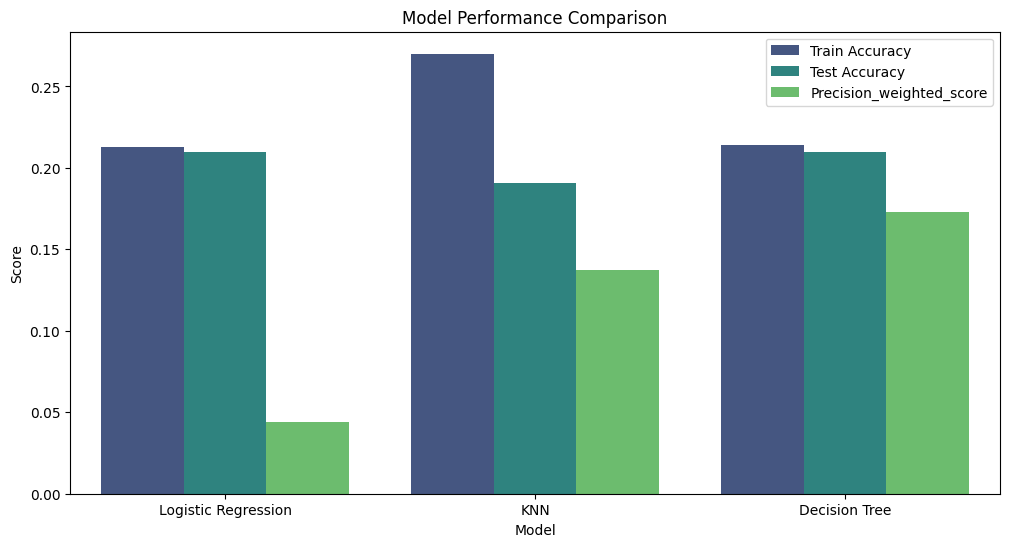

C:\Users\shiva\AppData\Local\Temp\ipykernel_28452\2051707524.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Train Time', data=GS_results_df, palette='viridis')


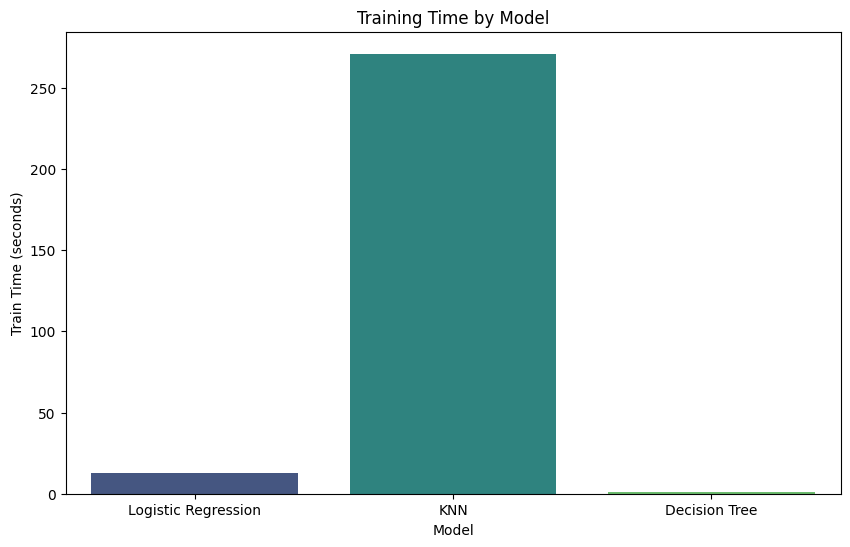

In [49]:
# Create a melted DataFrame for easier plotting
results_melted = GS_results_df.melt(id_vars='Model', value_vars=['Train Accuracy', 'Test Accuracy', 'Precision_weighted_score'],
                                   var_name='Metric', value_name='Score')

# Create a bar plot for accuracy and precision_score metrics
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Score', hue='Metric', data=results_melted, palette='viridis')
plt.title('Model Performance Comparison')
plt.xlabel('Model')
plt.ylabel('Score')
plt.legend(loc='best')
plt.show()

# Create a separate bar plot for training time
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Train Time', data=GS_results_df, palette='viridis')
plt.title('Training Time by Model')
plt.xlabel('Model')
plt.ylabel('Train Time (seconds)')
plt.show()

### GridSearch on RandomForest, XGBoost, SVM

LogisticRegression, KNN, and DecisionTree classifiers have yeilded low accuracy and precision_weighted scores. This is due to the imbalance datapoints of classes in the target feature 'shape'. Also, due to the fact that correlation between input features and the target feature is exteremly low. There is no linear realtionship between the features. Based on scatterplots above, we concluded that strong seperable clusters of different classes of UFO shapes in relation to any of the features do not exist. Let's now consider using other classification algortithms that can improve the preformance. 

1. Random Forest Classifier: 
    - Known for its robustness against overfitting, Random Forests handle categorical features effectively and can capture non-linear relationships in data. However, tuning hyperparameters such as the number of trees and tree depth is crucial to optimize performance.

2. Gradient Boosting Classifier (e.g., XGBoost, LightGBM, CatBoost): 
    - Often delivering state-of-the-art performance, Gradient Boosting methods excel in handling complex interactions between features and automatically manage missing values. They are versatile but more prone to overfitting compared to Random Forests, necessitating careful regularization and cross-validation strategies.

3. Support Vector Machines (SVM): 
    - SVMs are effective in high-dimensional spaces where the number of dimensions exceeds the number of samples. They excel in capturing complex decision boundaries but can be memory-intensive and require feature scaling. Selecting the right kernel function and tuning regularization parameters (C and gamma) are critical for optimal performance.

In [ ]:
'RandomForestClassifier': (RandomForestClassifier(),{'classifier__n_estimators': [100,200,500,700,1000], 'classifier__max_depth': [10, 20, 30, None], 'classifier__max_features': ['sqrt', 'log2'],
                                                         'classifier__min_samples_split': [2, 5, 10], 'classifier__min_samples_leaf': [1, 2, 4],

### NPL (Extracting Comments)

In [ ]:
# Creting new dataset to store NLP features 
ufo_nlp = ufo_clean[['shape', 'comments']]

# Download necessary resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

Text Preprocessing
  - Tokenization: Splitting text into individual words or tokens.
  - Lowercasing: Converting all text to lowercase to ensure consistency.
  - Removing Punctuation: Eliminating non-alphanumeric characters.
  - Removing Stopwords: Common words like "the", "and", "is" that add little meaning.
  - Normalization: Stemming or lemmatization to reduce words to their base form (e.g., "running" to "run").

In [ ]:
# Function for text preprocessing
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text)
    
    # Lowercasing
    tokens = [token.lower() for token in tokens]
    
    # Removing punctuation
    tokens = [token for token in tokens if token not in string.punctuation]
    
    # Removing stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    # Join tokens back into text
    processed_text = ' '.join(tokens)
    
    return processed_text

# Apply preprocessing to the 'comments' column
ufo_nlp['processed_comments'] = ufo_nlp['comments'].astype(str).apply(preprocess_text)

In [ ]:
# Processed Comments
ufo_nlp

- Indentifying most common words in the dataset

In [ ]:
from collections import Counter

# Combine all processed comments into a single string
all_comments_combined = ' '.join(ufo_nlp['processed_comments'])

# Tokenize the combined text into words
all_tokens = word_tokenize(all_comments_combined)

# Calculate word frequencies
word_freq = Counter(all_tokens)

# Convert Counter to a DataFrame
word_freq_df = pd.DataFrame(list(word_freq.items()), columns=['Word', 'Frequency'])

# Sort DataFrame by frequency in descending order
word_freq_df = word_freq_df.sort_values(by='Frequency', ascending=False).reset_index(drop=True)

# Display the top 10 words by frequency
word_freq_df


There are about 34,205 unique words or characters in the processed comments text data. Many words appear only once, while some appear thousands of times. We can continue analyzing the text data to further investigate the possibility of factoring this information into our models. We can also observe from the above table, the number '44' is the most common text data present with in these comments. This anamoly should be removed before further preprocessing text data for modeling. We should also remove words that are not common.

In [ ]:
least_common_words = word_freq_df[word_freq_df['Frequency'] < 10]
most_common_words = word_freq_df[word_freq_df['Frequency'] > 100]
average_common_words = word_freq_df[(word_freq_df['Frequency'] > 10) & (word_freq_df['Frequency'] < 100) ]